In [230]:
your_local_path = "D:/Premy/UPX/ML/Practice/"

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
churn_data_df = pd.read_csv(your_local_path +"latest.csv")

In [233]:
churn_data_df.head()

,Unnamed: 0,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
1,1,70099932,1,NaN,11,RBS,94.00,219,N,202007.0
2,2,70109566,1,NaN,15,RBS,126.00,221,N,202107.0
3,3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
4,4,70116504,1,NaN,11,VDSL,128.99,221,N,202008.0


In [234]:
churn_data_df.drop([churn_data_df.columns[0]], axis='columns', inplace = True)
churn_data_df.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
1,70099932,1,NaN,11,RBS,94.00,219,N,202007.0
2,70109566,1,NaN,15,RBS,126.00,221,N,202107.0
3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
4,70116504,1,NaN,11,VDSL,128.99,221,N,202008.0


In [235]:
churn_data_df.isna().sum()

acct_no                0
cont_no                0
gender             30346
bill_cycl              0
serv_type              0
secured_revenue    17378
tenure                 0
churn                  0
contract_end       16905
dtype: int64

Gender column has quite a few null values.

In [236]:
# Handling null values in Gender column 
churn_data_df = churn_data_df.dropna(axis=0, subset=['gender'])


In [379]:
churn_data_df.isna().sum()

acct_no            0
cont_no            0
gender             0
bill_cycl          0
serv_type          0
secured_revenue    0
tenure             0
churn              0
contract_end       0
dtype: int64

In [380]:
churn_data_df.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
5,70032404,1,M,11,RBS,128.34,225,N,202204.0
6,70195318,1,M,1,RBS,174.00,216,N,202103.0
8,70224076,1,M,11,VDSL,90.45,220,N,202104.0


In [381]:
churn_data_df["secured_revenue"].fillna(0, inplace = True)

In [382]:
churn_data_df["contract_end"].fillna(0, inplace = True)

In [383]:
churn_data_df.isna().sum()

acct_no            0
cont_no            0
gender             0
bill_cycl          0
serv_type          0
secured_revenue    0
tenure             0
churn              0
contract_end       0
dtype: int64

In [384]:
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248059 entries, 0 to 278404
Data columns (total 9 columns):
acct_no            248059 non-null int64
cont_no            248059 non-null int64
gender             248059 non-null object
bill_cycl          248059 non-null int64
serv_type          248059 non-null object
secured_revenue    248059 non-null float64
tenure             248059 non-null int64
churn              248059 non-null object
contract_end       248059 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 28.9+ MB


In [242]:
churn_data_df.describe()

,acct_no,cont_no,bill_cycl,secured_revenue,tenure,contract_end
count,2.480590e+05,248059.000000,248059.000000,248059.000000,248059.000000,248059.000000
mean,9.149096e+07,1.342975,17.259991,126.275963,67.595310,198028.509661
std,7.266804e+06,11.249306,7.254002,58.904122,55.084237,28306.876215
min,7.000274e+07,1.000000,1.000000,0.000000,0.000000,0.000000
25%,9.191893e+07,1.000000,11.000000,94.000000,20.000000,202007.000000
50%,9.447447e+07,1.000000,18.000000,120.050000,51.000000,202101.000000
75%,9.548646e+07,1.000000,25.000000,147.980000,105.000000,202109.000000
max,9.647528e+07,513.000000,25.000000,2612.000000,230.000000,202305.000000


In [385]:
churn_data_df.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
5,70032404,1,M,11,RBS,128.34,225,N,202204.0
6,70195318,1,M,1,RBS,174.00,216,N,202103.0
8,70224076,1,M,11,VDSL,90.45,220,N,202104.0


In [244]:
churn_data_df.churn.value_counts()

N    246795
Y      1264
Name: churn, dtype: int64

In [387]:
# Taking categorical columns
churn_cat_df = churn_data_df[['gender', 'serv_type', 'churn']]
churn_cat_df.head()

,gender,serv_type,churn
0,M,VDSL,N
3,M,VDSL,N
5,M,RBS,N
6,M,RBS,N
8,M,VDSL,N


In [388]:
# Creating dummy columns for categorical values 
churn_catcols = pd.get_dummies(churn_cat_df )

In [389]:
churn_catcols.drop(['churn_N'], axis = 1, inplace = True)
churn_catcols.head()

,gender_F,gender_M,serv_type_ADSL,serv_type_RBS,serv_type_VDSL,churn_Y
0,0,1,0,0,1,0
3,0,1,0,0,1,0
5,0,1,0,1,0,0
6,0,1,0,1,0,0
8,0,1,0,0,1,0


In [390]:
churn_catcols.drop(['gender_F'], axis = 1, inplace = True)
churn_catcols.head()

,gender_M,serv_type_ADSL,serv_type_RBS,serv_type_VDSL,churn_Y
0,1,0,0,1,0
3,1,0,0,1,0
5,1,0,1,0,0
6,1,0,1,0,0
8,1,0,0,1,0


In [391]:
num_df = churn_data_df.drop(['acct_no','cont_no','gender','serv_type','churn'], axis = 1)

In [392]:
churn_data_imbalanced_df = pd.concat([num_df, churn_catcols], axis = 1)

In [393]:
churn_data_imbalanced_df.head()

,bill_cycl,secured_revenue,tenure,contract_end,gender_M,serv_type_ADSL,serv_type_RBS,serv_type_VDSL,churn_Y
0,1,137.98,216,202003.0,1,0,0,1,0
3,15,77.00,219,202001.0,1,0,0,1,0
5,11,128.34,225,202204.0,1,0,1,0,0
6,1,174.00,216,202103.0,1,0,1,0,0
8,11,90.45,220,202104.0,1,0,0,1,0


In [394]:
y = churn_data_imbalanced_df["churn_Y"].values

X = churn_data_imbalanced_df.drop(['churn_Y'], axis=1)

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)


[[-2.08776248e-02  1.80560394e-04 -6.91818823e-03 -1.17305366e-04
  -1.15044217e-03 -4.73283004e-06 -1.22260086e-03  7.68915195e-05]]
[-0.00115044]


In [396]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=12345)

In [397]:
logreg.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [398]:
y_pred_test = logreg.predict(xTest)

In [399]:
print(metrics.accuracy_score(yTest, y_pred_test))
print(metrics.recall_score(yTest, y_pred_test))

0.9947727700287565
0.0


In [400]:
conf = metrics.confusion_matrix(yTest, y_pred_test)
conf

array([[74029,     0],
       [  389,     0]], dtype=int64)

In [401]:
from sklearn.metrics import classification_report

print(classification_report(yTest, y_pred_test))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     74029
          1       0.00      0.00      0.00       389

avg / total       0.99      0.99      0.99     74418



C:\Users\premy_unni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


There is data imbalance, will try Undersampling

In [304]:
churn = len(churn_data_df[churn_data_df['churn'] == 'Y'])

In [305]:
# Get indices of non churn data
non_churn_indices = churn_data_df[churn_data_df.churn == 'N'].index

In [306]:
# Random sample of non churn data
random_indices = np.random.choice(non_churn_indices,churn, replace=False)

In [307]:
# Find indices of churn data
churn_indices = churn_data_df[churn_data_df.churn == 'Y'].index

In [308]:
under_sample_indices = np.concatenate([churn_indices,random_indices])

In [309]:
churn_under_sample = churn_data_df.loc[under_sample_indices]

In [310]:
churn_under_sample.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
567,72760739,1,M,11,VDSL,69.0,172,Y,0.0
575,72863400,1,M,15,RBS,169.0,182,Y,0.0
618,72817273,1,M,1,RBS,269.0,183,Y,0.0
813,73797581,1,M,11,RBS,269.0,170,Y,0.0
893,74028879,1,M,1,RBS,169.0,168,Y,0.0


In [311]:
churn_under_sample.churn.value_counts()

N    1264
Y    1264
Name: churn, dtype: int64

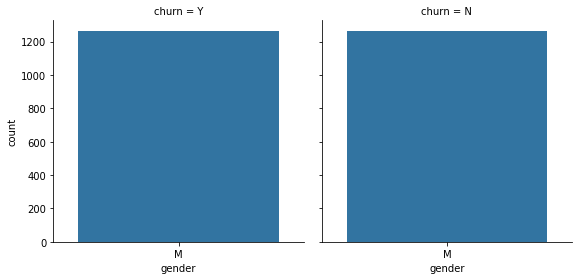

In [158]:
sns.factorplot(x='gender', col='churn', kind='count', data=churn_under_sample);

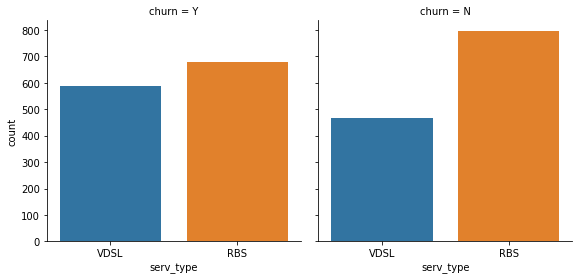

In [159]:
sns.factorplot(x='serv_type', col='churn', kind='count', data=churn_under_sample);

In [312]:
# Taking categorical columns
churn_cat_df = churn_under_sample[['gender', 'serv_type', 'churn']]
churn_cat_df.head()

,gender,serv_type,churn
567,M,VDSL,Y
575,M,RBS,Y
618,M,RBS,Y
813,M,RBS,Y
893,M,RBS,Y


In [313]:
# Creating dummy columns for categorical values 
churn_catcols = pd.get_dummies(churn_cat_df )

In [314]:
churn_catcols.drop(['churn_N'], axis = 1, inplace = True)
churn_catcols.head()

,gender_M,serv_type_ADSL,serv_type_RBS,serv_type_VDSL,churn_Y
567,1,0,0,1,1
575,1,0,1,0,1
618,1,0,1,0,1
813,1,0,1,0,1
893,1,0,1,0,1


In [315]:
churn_catcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 567 to 170236
Data columns (total 5 columns):
gender_M          2528 non-null uint8
serv_type_ADSL    2528 non-null uint8
serv_type_RBS     2528 non-null uint8
serv_type_VDSL    2528 non-null uint8
churn_Y           2528 non-null uint8
dtypes: uint8(5)
memory usage: 32.1 KB


In [347]:
churn_under_sample.tail()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
102382,95709630,1,M,18,RBS,93.96,14,N,202008.0
167754,91478347,1,M,25,RBS,99.00,112,N,202111.0
210682,91225664,1,M,25,VDSL,109.80,117,N,202203.0
107270,93168649,1,M,18,VDSL,128.34,93,N,202004.0
170236,95000477,1,M,25,RBS,298.00,35,N,202011.0


In [362]:
num_df = churn_under_sample.drop(['acct_no','gender','cont_no','serv_type','churn'], axis = 1)

In [363]:
num_df.head()

,bill_cycl,secured_revenue,tenure,contract_end
567,11,69.0,172,0.0
575,15,169.0,182,0.0
618,1,269.0,183,0.0
813,11,269.0,170,0.0
893,1,169.0,168,0.0


In [364]:
churn_final_df = pd.concat([num_df, churn_catcols], axis = 1)

In [365]:
churn_final_df.head()

,bill_cycl,secured_revenue,tenure,contract_end,gender_M,serv_type_ADSL,serv_type_RBS,serv_type_VDSL,churn_Y
567,11,69.0,172,0.0,1,0,0,1,1
575,15,169.0,182,0.0,1,0,1,0,1
618,1,269.0,183,0.0,1,0,1,0,1
813,11,269.0,170,0.0,1,0,1,0,1
893,1,169.0,168,0.0,1,0,1,0,1


In [366]:
churn_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 567 to 170236
Data columns (total 9 columns):
bill_cycl          2528 non-null int64
secured_revenue    2528 non-null float64
tenure             2528 non-null int64
contract_end       2528 non-null float64
gender_M           2528 non-null uint8
serv_type_ADSL     2528 non-null uint8
serv_type_RBS      2528 non-null uint8
serv_type_VDSL     2528 non-null uint8
churn_Y            2528 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 111.1 KB


In [367]:
y = churn_final_df["churn_Y"].values

X = churn_final_df.drop(['churn_Y'], axis=1)

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)


[[ 6.04621011e-03  9.18328228e-03  1.73568948e-02 -1.06311824e-04
   3.08019750e-04 -3.66437202e-13  1.65653576e-04  1.42366174e-04]]
[0.00030802]


In [369]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=12345)

In [370]:
logreg.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [371]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.00581078  0.00875847  0.01682472 -0.00010511  0.00029822  0.
   0.00015679  0.00014142]]
[0.00029822]


In [372]:
y_pred_test = logreg.predict(xTest)

In [373]:
print(metrics.accuracy_score(yTest, y_pred_test))
print(metrics.recall_score(yTest, y_pred_test))

0.9894598155467721
1.0


In [374]:
conf = metrics.confusion_matrix(yTest, y_pred_test)
conf

array([[360,   8],
       [  0, 391]], dtype=int64)

In [375]:
from sklearn.metrics import classification_report

print(classification_report(yTest, y_pred_test))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       368
          1       0.98      1.00      0.99       391

avg / total       0.99      0.99      0.99       759

